In [1]:
from sqlmodel import Field, SQLModel

# SQLModel classes
class Intent(SQLModel, table=True):
    intent_id: int | None = Field(default=None, primary_key=True)
    intent_name: str = Field(index=True, unique=True)
    description: str | None = Field(default=None)

class Parameter(SQLModel, table=True):
    parameter_id: int | None = Field(default=None, primary_key=True)
    intent_id: int = Field(foreign_key="intent.intent_id")
    parameter_name: str = Field(index=True)
    parameter_type: str
    class Config:
        table_args = ({"sqlite_autoincrement": True}, {"unique": ["intent_id", "parameter_name"]})

class RequiredParameter(SQLModel, table=True):
    required_id: int | None = Field(default=None, primary_key=True)
    intent_id: int = Field(foreign_key="intent.intent_id")
    parameter_name: str
    class Config:
        table_args = ({"sqlite_autoincrement": True}, {"unique": ["intent_id", "parameter_name"]})

class Response(SQLModel, table=True):
    response_id: int | None = Field(default=None, primary_key=True)
    intent_id: int = Field(foreign_key="intent.intent_id")
    platform: str
    response_value: str
    class Config:
        table_args = ({"sqlite_autoincrement": True}, {"unique": ["intent_id", "platform"]})


In [3]:
from sqlmodel import Session, SQLModel, create_engine

# Database setup
sqlite_file_name = "../static/db/navigation_intents.db"
sqlite_url = f"sqlite:///{sqlite_file_name}"
connect_args = {"check_same_thread": False}
engine = create_engine(sqlite_url, connect_args=connect_args)

In [4]:
SQLModel.metadata.create_all(engine)

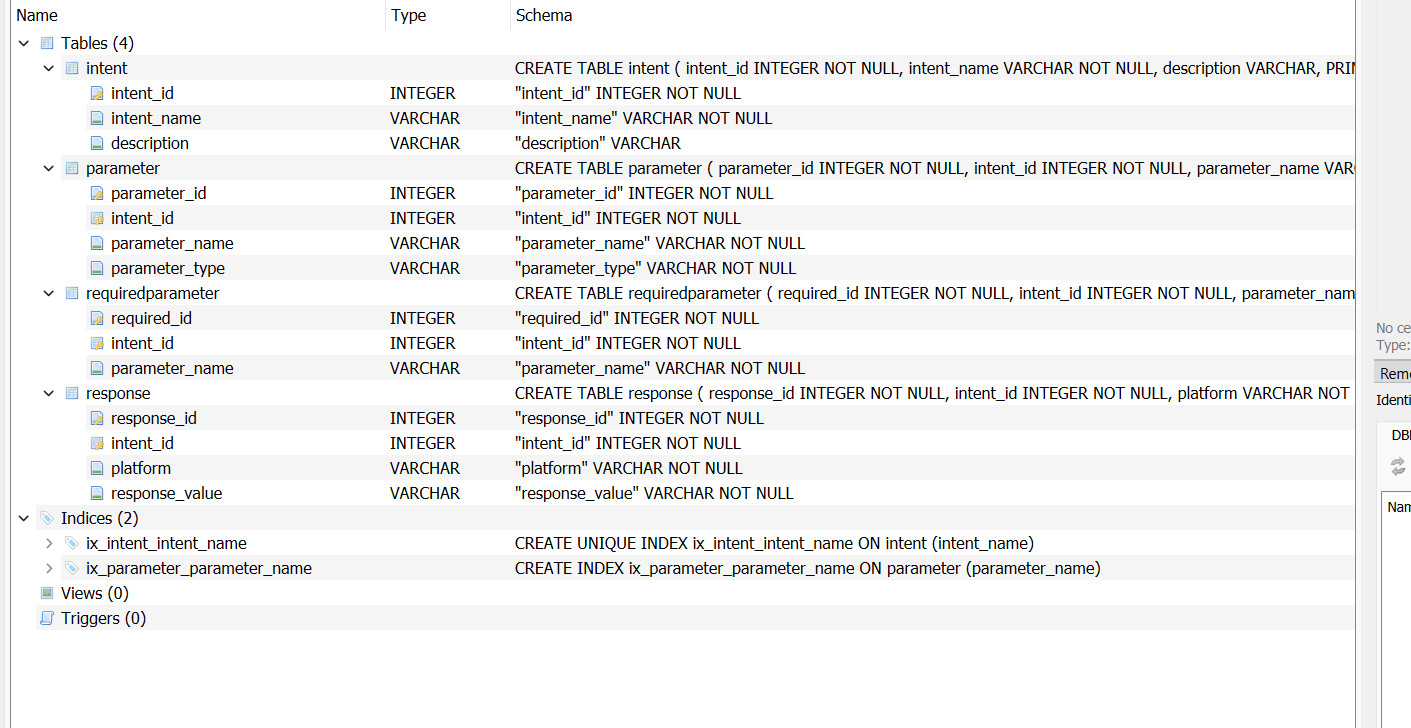